In [202]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [203]:
# Sections
a1 = -3
b1 = 12.1

a2 = 4.1
b2 = 5.8

# Additional data
epsilon = 1e-5
populationSize = 150

# Iterations 
t_max_i = 40
t_max = 200

# Propabilities
probCrossover = 0.6
probMutation = 0.02

In [204]:
def getBitArraySize(n):
    bitArraySize = 0
    
    while n > 0:
        n >>= 1
        bitArraySize += 1
        
    return bitArraySize

In [205]:
n1 = (int)((b1 - a1) / epsilon)
n2 = (int)((b2 - a2) / epsilon)

bitArraySize1 = getBitArraySize(n1)
bitArraySize2 = getBitArraySize(n2)

In [206]:
def f(x1, x2):
    #return x1**2 + x2**2
    return 21.5 + x1 * math.sin(4 * math.pi * x1) + x2 * math.sin(20 * math.pi* x2)

In [207]:
def bitToFloat(bitArray, a, b, size):
    return a + ((b - a)) / (2**size - 1) * int(bitArray, 2)

def fitness(individuals):
    return f(bitToFloat(individuals[0], a1, b1, bitArraySize1), bitToFloat(individuals[1], a2, b2, bitArraySize2))

def populationFitnessFunc(population, lens):
    maximum = 0
    xiForMaximum = 0
    
    for individual in population:
        xi = []
        i = 0
        
        for j in range(0, len(lens)):
            xi.append(individual[i:i + lens[j]])
            i += lens[j]
            
        if fitness(xi) > maximum:
            maximum = fitness(xi)
            xiForMaximum = xi
     
    return maximum, xiForMaximum

In [208]:
def tournamentMethod(population, lens):
    result = random.sample(population, 2)

    maximum = 0
    
    for individual in result:
        xi = []
        i = 0
        
        for j in range(0, len(lens)):
            xi.append(individual[i:i + lens[j]])
            i += lens[j]
            
        if fitness(xi) > maximum:
            maximum = fitness(xi)
            best = individual

    return best

def mutation(individual):
    randomProbability = np.random.random_sample()

    if randomProbability <= probMutation:
        charIndexToMutate = np.random.randint(low = 0, high = bitArraySize1+bitArraySize2)
        charToMutate = individual[charIndexToMutate] 

        if charToMutate == '0':
            individual = individual[:charIndexToMutate] + "1" + individual[charIndexToMutate + 1:]
        else:
            individual = individual[:charIndexToMutate] + "0" + individual[charIndexToMutate + 1:]

    return individual

def crossover(population):    
    individualOne = population[np.random.randint(low = 0, high = populationSize - 1)]
    individualTwo = population[np.random.randint(low = 0, high = populationSize - 1)]

    probabilityForCrossover = np.random.random_sample()
    if probabilityForCrossover <= probCrossover:
        randomIndex = np.random.randint(low = 0, high = bitArraySize1 + bitArraySize2)

        firstHalf_IndividualOne = individualOne[:randomIndex]
        secondHalf_IndividualOne = individualOne[randomIndex:]

        firstHalf_IndividualTwo = individualTwo[:randomIndex]
        secondHalf_IndividualTwo = individualTwo[randomIndex:]

        crossovered = firstHalf_IndividualOne + secondHalf_IndividualTwo
        crossovered = firstHalf_IndividualTwo + secondHalf_IndividualOne
    else:
        crossovered = individualOne
        crossovered = individualTwo
            
    return crossovered

In [209]:
def applyTournamentForPopulation(population, lens):
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        best = tournamentMethod(population, lens) 
        newPopulation.append(best)
    
    return newPopulation

def mutatePopulation(population):
    newPopulation = []
    
    for individual in population:
        mutatedIndividual = mutation(individual)
        newPopulation.append(mutatedIndividual)

    return newPopulation
        
def crossoverPopulation(population):    
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        crossoveredIndividuals = crossover(population)
        newPopulation.append(crossoveredIndividuals)
            
    return newPopulation

x =  11.62432304588463
y =  5.4248032562380075

f_max =  38.54829121200033


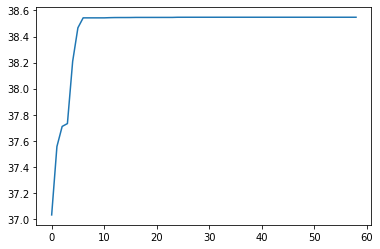

In [217]:
initialPopulation = []
population = []

for i in range(populationSize):
    initialPopulation += [np.random.randint(2, size = (bitArraySize1 + bitArraySize2,))]
    
for i in range(populationSize):
    population.append("".join(str(x) for x in initialPopulation[i]))

iterations = []
functions = []

best = []
bestXY = []

i = 0
max_i = 0

while i <= t_max:
    population = applyTournamentForPopulation(population, [bitArraySize1, bitArraySize2])
    population = mutatePopulation(population)
    population = crossoverPopulation(population)

    fitFunc, fitXY = populationFitnessFunc(population, [bitArraySize1, bitArraySize2])
    
    best.append(fitFunc)
    bestXY.append(fitXY)

    if i > 1:
        #print('\nf_max = ', best[i])
        if best[i] - best[i - 1] < epsilon:
            max_i += 1

    if max_i > t_max_i:
        break

    iterations.append(i)
    functions.append(best[i])

    #print(best[i])
    i += 1    

xBit = bestXY[i - 1][0]
yBit = bestXY[i - 1][1]

x = bitToFloat(xBit, a1, b1, bitArraySize1)
y = bitToFloat(yBit, a2, b2, bitArraySize2)

print('x = ', x)
print('y = ', y)
print('\nf_max = ', best[i - 1])

plt.plot(iterations, functions)